In [1]:
import nltk
from nltk.corpus import stopwords
import texthero as hero

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
df = pd.read_csv('datasets/Reviews.csv')
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [3]:
df.shape

(568454, 10)

array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

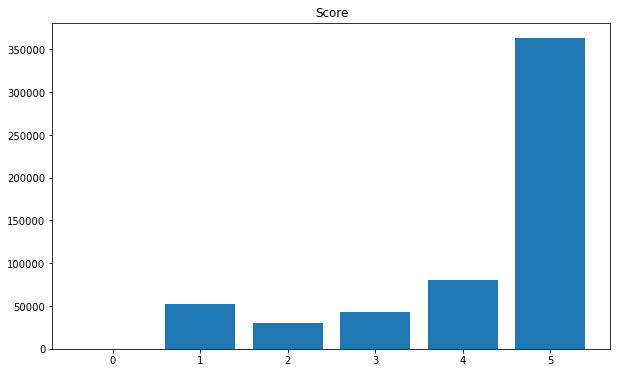

In [4]:
df.hist(column='Score', figsize=(10,6), bins=np.arange(7) - 0.5, grid=False, rwidth=0.8)

In [5]:
hero.remove_stopwords(df['Text'].astype(str), stopwords.words('portuguese')).values[0]

hero.remove_digits(df['Text'].astype(str)).values[0]
hero.remove_punctuation(df['Text'].astype(str)).values[0]
hero.remove_urls(df['Text'].astype(str)).values[0]
hero.remove_brackets(df['Text'].astype(str)).values[0]
hero.remove_whitespace(df['Text'].astype(str)).values[0]


'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.'

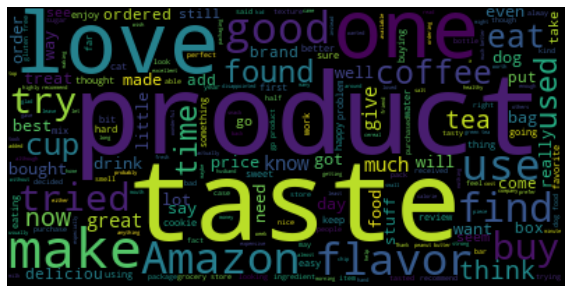

In [6]:
# Para instalar wordcloud, abra um terminal e execute [pip install wordcloud]
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
df['Sentiment'] = df['Score'].apply(lambda rating : 1 if rating > 3 else 0)

In [8]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Sentiment  
0          1  
1          0  
2          1  
3          0  
4          1

In [9]:
positive = df[df['Sentiment'] == 1]
negative = df[df['Sentiment'] == 0]

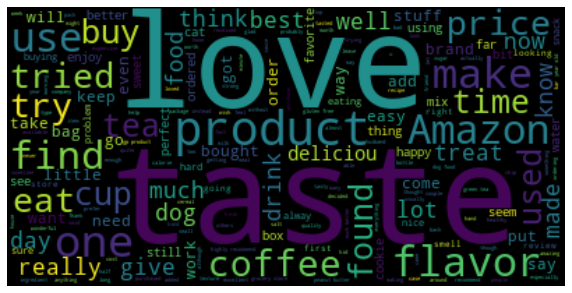

In [10]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "good","great"]) 
pos = " ".join(review for review in positive.Text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

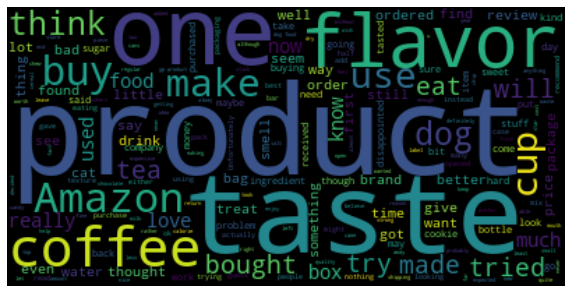

In [11]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "good","great"])
neg = " ".join(review for review in negative.Text)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

array([[<AxesSubplot:title={'center':'Sentiment'}>]], dtype=object)

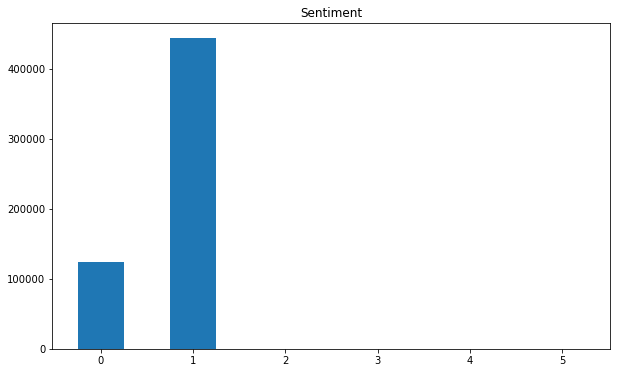

In [12]:
df.hist(column='Sentiment', figsize=(10,6), bins=np.arange(7) - 0.5, grid=False, rwidth=0.5)

In [13]:
from sklearn.model_selection import train_test_split

X = df['Text']
Y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
x_train.shape, y_train.shape

((454763,), (454763,))

In [15]:
x_test.shape, y_test.shape

((113691,), (113691,))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train_vet = vectorizer.fit_transform(x_train)
x_test_vet = vectorizer.transform(x_test)

In [17]:
print(vectorizer.vocabulary_)

{'was': 105378, 'sooo': 91374, 'happy': 50106, 'when': 106203, 'found': 44641, 'you': 108481, 'could': 30624, 'purchases': 79719, 'this': 98210, 'online': 71273, 've': 103666, 'tried': 100264, 'lot': 61559, 'of': 70746, 'chai': 25195, 'tea': 97031, 'lattes': 59592, 'and': 7862, 'always': 7321, 'come': 28421, 'back': 17157, 'to': 98958, 'one': 71225, 'it': 56060, 'has': 50316, 'wonderful': 107219, 'full': 45640, 'taste': 96810, 'appreciate': 8756, 'that': 97830, 'mix': 66038, 'complete': 28814, 'dissolves': 36097, 'usually': 103190, 'use': 103122, 'half': 49796, 'milk': 65368, 'water': 105478, 'make': 62603, 'mine': 65524, 'oooooh': 71395, 'heaven': 50816, 'br': 21207, 'in': 53903, 'henderson': 51079, 'nv': 70250, 'saxby': 86411, 'carried': 24287, 'brand': 21307, 'addicted': 5565, 'moved': 67142, 'wa': 104932, 'state': 93153, 'took': 99282, 'me': 64112, 'long': 61322, 'time': 98686, 'find': 43076, 'even': 40585, 'close': 27543, 'but': 22643, 'nothing': 69690, 'compares': 28690, 'on': 71

In [18]:
print(*vectorizer.idf_)

5.925250257572646 7.881204624383822 12.081623732997405 12.92892159338461 12.92892159338461 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 11.948092340372883 13.334386701492773 13.334386701492773 11.948092340372883 11.8303093047165 12.641239520932828 13.334386701492773 13.334386701492773 11.462584524591183 12.92892159338461 12.92892159338461 12.92892159338461 12.92892159338461 12.92892159338461 12.92892159338461 12.92892159338461 12.92892159338461 12.92892159338461 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 12.92892159338461 13.334386701492773 12.92892159338461 11.724948789058674 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492

9.77903864000336 10.89203966612357 13.334386701492773 12.235774412824664 13.334386701492773 12.641239520932828 13.334386701492773 12.235774412824664 13.334386701492773 12.92892159338461 13.334386701492773 11.319483680950508 12.92892159338461 13.334386701492773 12.92892159338461 13.334386701492773 12.92892159338461 9.452822903549336 11.8303093047165 12.92892159338461 12.081623732997405 12.081623732997405 12.235774412824664 13.334386701492773 10.289864263769351 10.849480051704774 12.92892159338461 7.5262442115123305 10.177386280342661 13.334386701492773 13.334386701492773 12.641239520932828 11.8303093047165 10.849480051704774 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 11.948092340372883 13.334386701492773 13.334386701492773 12.92892159338461 12.235774412824664 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 12.92892159338461 10.313961815348412 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701

 11.542627232264719 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.254945159812937 13.334386701492773 13.334386701492773 12.235774412824664 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 12.92892159338461 12.641239520932828 12.641239520932828 13.334386701492773 12.641239520932828 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 12.92892159338461 10.038549835488444 12.92892159338461 13.334386701492773 13.334386701492773 12.235774412824664 12.641239520932828 10.00218219131757 10.289864263769351 13.334386701492773 10.313961815348412 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 10.416615969408495 13.334386701492773 10.808658057184518 13.334386701492773 11.031801608498728 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 12.92892159338461 8.555263208381245 1

11.194320537996504 13.334386701492773 13.334386701492773 12.92892159338461 12.641239520932828 11.948092340372883 13.334386701492773 12.641239520932828 13.334386701492773 10.936491428694403 13.334386701492773 10.89203966612357 12.641239520932828 2.9444840525708007 13.334386701492773 12.41809596961862 12.92892159338461 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 6.087662305690837 12.92892159338461 13.334386701492773 12.081623732997405 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 12.081623732997405 12.235774412824664 12.41809596961862 11.194320537996504 12.235774412824664 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 9.452822903549336 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 11.724948789058674 10.769437344031237 11.8303093047165 11.629638609254348 11.319483680950508 12.92892159338461 12.641239520932828 13.3343

 13.334386701492773 12.641239520932828 10.501173357436558 11.462584524591183 13.334386701492773 8.709413888208502 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 8.602583864571317 9.884399155661187 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 12.081623732997405 8.44403757327102 6.329051094171773 8.514105135887737 10.44401494359661 12.641239520932828 12.235774412824664 8.971288076704411 11.542627232264719 13.334386701492773 12.641239520932828 7.395532104657089 11.38847655243746 13.334386701492773 11.948092340372883 9.167721477691048 13.334386701492773 13.334386701492773 11.948092340372883 11.031801608498728 13.334386701492773 11.948092340372883 13.334386701492773 12.641239520932828 7.083446673823192 12.92892159338461 12.92892159338461 13.334386701492773 10.389947722326333 12.92892159338461 13.334386701492773 12.92892159338461 10.220871392

12.641239520932828 13.334386701492773 13.334386701492773 11.629638609254348 13.334386701492773 12.235774412824664 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.724948789058674 7.940759155140412 13.334386701492773 12.641239520932828 7.956796154050229 9.463185690584883 11.542627232264719 3.2886836971596773 12.641239520932828 12.41809596961862 13.334386701492773 7.737818311143722 12.92892159338461 13.334386701492773 10.338654427938783 13.334386701492773 12.235774412824664 10.363972235923073 13.334386701492773 8.213403350227653 13.334386701492773 12.41809596961862 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 5.56247644505701 13.334386701492773 13.334386701492773 4.806946193624987 12.41809596961862 11.083094902886279 13.334386701492773 11.724948789058674 12.235774412824664 10.389947722326333 12.92892159338461 12.92892159338461 13.334386701492773 13.334386701492773 12.081623732997405 13.334386701492773 12.9289

9.916660017879408 11.38847655243746 12.92892159338461 13.334386701492773 11.629638609254348 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 5.209051614778484 13.334386701492773 12.92892159338461 11.948092340372883 13.334386701492773 12.41809596961862 8.946129517068258 13.334386701492773 10.561797979252992 13.334386701492773 10.338654427938783 7.041892064413511 11.38847655243746 13.334386701492773 13.334386701492773 9.737074440904328 12.92892159338461 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 12.081623732997405 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 11.462584524591183 13.334386701492773 12.41809596961862 12.641239520932828 4.285037015608717 13.334386701492773 12.641239520932828 13.334386701492773 12.92892159338461 11.629638609254348 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 11.948092340372883 12.92892159

 12.92892159338461 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.38847655243746 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 12.641239520932828 11.724948789058674 12.92892159338461 13.334386701492773 13.334386701492773 12.235774412824664 11.542627232264719 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.542627232264719 13.334386701492773 12.92892159338461 12.235774412824664 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 11.254945159812937 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 1

 13.334386701492773 12.41809596961862 13.334386701492773 13.334386701492773 12.081623732997405 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.948092340372883 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 12.41809596961862 13.334386701492773 12.92892159338461 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 12.41809596961862 1

12.92892159338461 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.235774412824664 13.334386701492773 12.92892159338461 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.319483680950508 13.334386701492773 11.948092340372883 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 13.334386701492773 12.081623732997405 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.724948789058674

 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 11.948092340372883 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 10.849480051704774 12.92892159338461 12.92892159338461 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 11.319483680950508 13.334386701492773 13.334386701492773 13.334386701492773 11.8303093047165 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 1

12.41809596961862 12.92892159338461 13.334386701492773 11.724948789058674 13.334386701492773 8.530365656759518 13.334386701492773 13.334386701492773 11.542627232264719 4.7277185036489335 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 12.235774412824664 13.334386701492773 12.92892159338461 10.177386280342661 11.319483680950508 12.081623732997405 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 12.235774412824664 12.92892159338461 13.334386701492773 11.724948789058674 10.808658057184518 12.92892159338461 11.542627232264719 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 12.641239520932828 12.641239520932828 13.334386701492773 12.92892159338461 6.268346443544924 9.392804893823083 12.6

 3.0926606160127474 12.41809596961862 12.235774412824664 12.92892159338461 12.92892159338461 13.334386701492773 12.641239520932828 13.334386701492773 12.235774412824664 11.38847655243746 12.081623732997405 12.235774412824664 12.92892159338461 11.462584524591183 12.641239520932828 12.235774412824664 12.92892159338461 12.641239520932828 12.081623732997405 11.8303093047165 5.531155830350402 13.334386701492773 6.976544434984675 7.260190756787327 13.334386701492773 13.334386701492773 13.334386701492773 11.948092340372883 12.92892159338461 13.334386701492773 8.780509809892234 13.334386701492773 11.462584524591183 11.8303093047165 6.155841217729074 12.92892159338461 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 10.156332871144828 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 12.41809596961862 12.92892159338461 12.92892159338461 13.334386701492773 12.641239520932828 13.334386701492773 12.9289215933

13.334386701492773 13.334386701492773 11.38847655243746 13.334386701492773 13.334386701492773 13.334386701492773 11.319483680950508 12.92892159338461 13.334386701492773 13.334386701492773 11.462584524591183 12.641239520932828 11.38847655243746 12.641239520932828 10.44401494359661 13.334386701492773 9.853146612157083 12.92892159338461 10.769437344031237 12.235774412824664 13.334386701492773 10.660238052066244 13.334386701492773 12.92892159338461 13.334386701492773 12.235774412824664 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 11.948092340372883 13.334386701492773 9.12225910361429 11.542627232264719 13.334386701492773 12.235774412824664 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 12.41809596961862 12.92892159338461 8.801787208339519 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 12.92892159338461 8.089997676970292 12.235774412824664 8.75967572298939 11.724948

11.319483680950508 11.948092340372883 11.254945159812937 11.8303093047165 8.829036850786894 11.38847655243746 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 8.952360066818892 11.948092340372883 11.629638609254348 13.334386701492773 12.92892159338461 8.41806208686776 11.629638609254348 13.334386701492773 13.334386701492773 12.641239520932828 12.41809596961862 13.334386701492773 12.641239520932828 10.89203966612357 11.319483680950508 10.115510876624572 13.334386701492773 13.334386701492773 10.363972235923073 13.334386701492773 10.808658057184518 13.334386701492773 13.334386701492773 11.629638609254348 10.531026320586239 12.92892159338461 7.902850491158515 11.462584524591183 12.41809596961862 13.334386701492773 12.92892159338461 13.334386701492773 7.54137309310863 13.334386701492773 9.822841262661752 11.319483680950508 8.320423617303843 13.334386701492773 11.194320537996504 9.037101295273983 9.030321608288604 12.235774412824664 8.07949889287

12.92892159338461 13.334386701492773 13.334386701492773 12.92892159338461 10.936491428694403 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 12.41809596961862 10.00218219131757 12.235774412824664 12.235774412824664 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 12.641239520932828 12.081623732997405 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 9.696800541766388 10.289864263769351 12.41809596961862 10.769437344031237 9.658086029585698 11.319483680950508 12.081623732997405 11.8303093047165 9.949996438147 13.334386701492773 13.334386701492773 12.235774412824664 13.334386701492773 7.63227228393727 13.334386701492773 12.92892159338461 11.948092340372883 12.92892159338461 13.334386701492773 7.243076819415076 13.334386701492773 13.334386701492773 12.92892159338461 12.92892159338461 12.92892159338461 12.9289215933846

 10.983011444329296 11.724948789058674 12.92892159338461 11.254945159812937 12.235774412824664 13.334386701492773 4.981596566368147 11.724948789058674 12.92892159338461 13.334386701492773 9.53889751232058 10.849480051704774 8.116737238012192 10.115510876624572 12.92892159338461 10.135713583942092 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 12.641239520932828 13.334386701492773 12.92892159338461 12.641239520932828 12.92892159338461 8.018720696610124 13.334386701492773 11.8303093047165 12.92892159338461 12.081623732997405 13.334386701492773 13.334386701492773 10.243344248134457 13.334386701492773 12.92892159338461 10.44401494359661 13.334386701492773 11.542627232264719 11.629638609254348 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.235774412824664 13.334386701492773 7.490842284461414 10.89203966612357 12.92892159338461 13.334386701492773 13.334386701492773 10.28986426

12.92892159338461 13.334386701492773 10.076290163471292 13.334386701492773 9.364094787940651 12.92892159338461 7.862116027821299 11.8303093047165 12.92892159338461 13.334386701492773 12.641239520932828 13.334386701492773 9.043927260344383 12.081623732997405 12.92892159338461 11.031801608498728 11.542627232264719 12.081623732997405 13.334386701492773 13.334386701492773 11.254945159812937 13.334386701492773 12.92892159338461 11.38847655243746 13.334386701492773 13.334386701492773 9.505745305003678 13.334386701492773 5.322699972364927 13.334386701492773 8.486270336894293 13.334386701492773 10.983011444329296 12.92892159338461 10.626336500390563 11.031801608498728 12.41809596961862 13.334386701492773 6.997560970346333 13.334386701492773 12.92892159338461 13.334386701492773 8.144211493564441 13.334386701492773 12.235774412824664 13.334386701492773 12.92892159338461 7.282297532568357 8.775260454006089 12.92892159338461 13.334386701492773 10.849480051704774 13.334386701492773 13.3343867014927

13.334386701492773 10.936491428694403 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.8303093047165 13.334386701492773 13.334386701492773 12.92892159338461 12.641239520932828 13.334386701492773 13.334386701492773 12.081623732997405 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 9.60869327425612 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 12.081623732997405 12.081623732997405 8.347361273035652 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 11.254945159812937 13.334386701492773 11.8303093047165 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 10.660238052066244 13.334386701492773 10.593546677567574 12.92892159338461 7.3542359142850655 13.334386701492773 7.466503216156147 12.92892159338461 13.334386701492773 6.401451123980339 13.334386701492773 12.92892159338461 12.081623732997405 12.92892

 9.318003680740386 12.641239520932828 12.92892159338461 13.334386701492773 11.629638609254348 9.318003680740386 9.696800541766388 11.948092340372883 9.60869327425612 12.235774412824664 12.92892159338461 11.542627232264719 12.641239520932828 8.807178056974394 7.477883139818909 13.334386701492773 13.334386701492773 6.0451175352249855 12.081623732997405 12.235774412824664 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.081623732997405 12.92892159338461 12.92892159338461 8.807178056974394 11.254945159812937 9.900399497007628 8.486270336894293 11.8303093047165 12.92892159338461 8.68042635133525 10.849480051704774 10.808658057184518 11.8303093047165 11.083094902886279 13.334386701492773 9.41241336521146 10.501173357436558 12.235774412824664 12.641239520932828 12.92892159338461 9.003653361206442 13.334386701492773 8.840148076211964 13.334386701492773 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 

12.92892159338461 12.641239520932828 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 8.135889670226948 8.219391392072275 9.422363696064627 9.63308472738028 12.92892159338461 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.948092340372883 13.334386701492773 11.724948789058674 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.8303093047165 8.382086984409481 12.92892159338461 12.92892159338461 10.338654427938783 13.334386701492773 12.235774412824664 11.948092340372883 13.334386701492773 9.916660017879408 13.334386701492773 9.442566403382147 10.416615969408495 10.593546677567574 12.92892159338461 13.334386701492773 13.334386701492773 10.389947722326333 11.254945159812937 13.334386701492773 13.334386701492773 11.254945159812937 12.235774412824664 12.641239520932828 13.334386701492773 12.081623

 10.156332871144828 12.081623732997405 13.334386701492773 9.933189319830618 10.266333766359157 12.92892159338461 11.8303093047165 13.334386701492773 8.486270336894293 12.081623732997405 13.334386701492773 10.338654427938783 10.561797979252992 11.724948789058674 8.56370207702711 13.334386701492773 11.629638609254348 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 10.472185820563306 12.641239520932828 13.334386701492773 5.539769501327294 12.41809596961862 8.16960072756926 10.73169701604839 13.334386701492773 12.92892159338461 10.936491428694403 10.660238052066244 13.334386701492773 13.334386701492773 11.724948789058674 9.658086029585698 10.561797979252992 13.334386701492773 12.41809596961862 13.334386701492773 10.983011444329296 13.334386701492773 13.334386701492773 12.641239520932828 12.92892159338461 12.92892159338461 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 12.92892159338461 8.714327903010933 12.2357744128

8.86847858283819 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 12.235774412824664 13.334386701492773 12.92892159338461 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 7.800997212765254 13.334386701492773 13.334386701492773 13.334386701492773 12.081623732997405 13.334386701492773 12.41809596961862 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 6.390299493263247 13.334386701492773 13.334386701492773 6.9135777724866845 10.936491428694403 13.334386701492773 13.334386701492773 12.641239520932828 6.3792708511508 11.8303093047165 12.92892159338461 13.334386701492773 13.334386701492773 9.207252316447683 8.633906335700358 10.808658057184518 11.254945159812937 13.334386701492773 11.031801608498728 13.334386701492773 10.472185820563306 13.334386701492773 12.235774412824664 7.570764226

 13.334386701492773 12.641239520932828 12.235774412824664 13.334386701492773 12.641239520932828 12.92892159338461 13.334386701492773 13.334386701492773 12.41809596961862 12.641239520932828 10.73169701604839 11.254945159812937 11.8303093047165 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 12.641239520932828 11.031801608498728 12.641239520932828 13.334386701492773 13.334386701492773 11.948092340372883 12.641239520932828 6.125046444889865 10.561797979252992 13.334386701492773 10.983011444329296 6.530881443884436 8.59381187849848 13.334386701492773 8.482356437573156 13.334386701492773 12.41809596961862 13.334386701492773 6.189584966027436 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 10.983011444329296 10.531026320586239 13.334386701492773 13.334386701492773 13.334386701492773 11.948092340372883 13.334386701492773 13.334386701492773 13.334386701492773 11.46

 12.92892159338461 12.92892159338461 13.334386701492773 10.808658057184518 6.65793316152631 9.868650798693047 10.561797979252992 13.334386701492773 12.41809596961862 12.92892159338461 12.41809596961862 13.334386701492773 12.92892159338461 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 12.081623732997405 13.334386701492773 13.334386701492773 13.334386701492773 12.235774412824664 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 9.327053516260303 8.41440577566465 12.92892159338461 10.561797979252992 10.00218219131757 9.240042139270674 13.334386701492773 12.92892159338461 13.334386701492773 11.031801608498728 12.92892159338461 13.334386701492773 12.235774412824664 13.334386701492773 9.710045768516409 11.724948789058674 11.948092340372883 13.334386701492773 8.946129517068258 13.334386701492773 12.64123952093

12.92892159338461 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 12.92892159338461 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 6.0654665732990525 12.641239520932828 13.334386701492773 7.6924796305546606 7.295323175585513 13.334386701492773 13.334386701492773 13.334386701492773 8.656895853925057 13.334386701492773 12.641239520932828 9.309035010757624 9.300146063340378 13.334386701492773 12.41809596961862 7.486503882862816 12.235774412824664 12.92892159338461 8.327090308662033 13.334386701492773 9.02358757610726 8.857049887014568 12.92892159338461 13.334386701492773 8.585116171530926 11.194320537996504 10.695329371877515 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 11.254945159812937 13.334386701492773 10.115510876624572 12.92892159338461 13.334386701492773 13.334386701492773 8.749419222822201 9.043927260344383 12.081623732997405 9.6708250553631

7.578644487905862 7.732267880613073 12.92892159338461 13.334386701492773 11.948092340372883 12.92892159338461 10.936491428694403 13.334386701492773 9.336185999823575 11.319483680950508 8.958629679832487 12.92892159338461 13.334386701492773 10.660238052066244 10.695329371877515 12.641239520932828 12.92892159338461 12.641239520932828 13.334386701492773 12.92892159338461 12.081623732997405 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 11.194320537996504 13.334386701492773 10.695329371877515 11.724948789058674 13.334386701492773 11.948092340372883 10.038549835488444 13.334386701492773 13.334386701492773 8.620362110592602 13.334386701492773 12.92892159338461 12.92892159338461 10.983011444329296 12.92892159338461 12.641239520932828 13.334386701492773 9.309035010757624 13.334386701492773 12.235774412824664 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 11.54262

9.868650798693047 13.334386701492773 13.334386701492773 11.948092340372883 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.542627232264719 13.334386701492773 12.41809596961862 12.641239520932828 12.92892159338461 13.334386701492773 11.8303093047165 13.334386701492773 11.542627232264719 12.641239520932828 13.334386701492773 11.629638609254348 9.9670908715063 12.92892159338461 13.334386701492773 12.641239520932828 13.334386701492773 10.156332871144828 12.235774412824664 7.178467599419261 12.92892159338461 12.081623732997405 9.868650798693047 13.334386701492773 13.334386701492773 12.641239520932828 9.645507247378838 11.724948789058674 12.41809596961862 13.334386701492773 9.494934388899463 10.531026320586239 10.769437344031237 13.334386701492773 13.334386701492773 12.41809596961862 10.626336500390563 13.334386701492773 12.081623732997405 12.235774412824664 8.785786866993078 12.641239520932828 13.334386701492773 13.334386701492773 9.345402654

 10.156332871144828 10.038549835488444 13.334386701492773 12.641239520932828 11.724948789058674 12.92892159338461 11.724948789058674 11.38847655243746 8.946129517068258 12.92892159338461 12.41809596961862 8.64303881926363 10.849480051704774 10.00218219131757 12.081623732997405 12.235774412824664 13.334386701492773 13.334386701492773 7.8351713925778474 11.724948789058674 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 9.868650798693047 11.948092340372883 12.41809596961862 6.973084223919779 13.334386701492773 13.334386701492773 5.3591658628393635 12.92892159338461 13.334386701492773 7.263648973490284 12.92892159338461 10.156332871144828 9.683728460199035 13.334386701492773 12.081623732997405 10.266333766359157 12.641239520932828 12.92892159338461 12.235774412824664 10.936491428694403 12.641239520932828 12.235774412824664 11.948092340372883 12.641239520932828 10.198892485563624 7.66969161554462 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596

12.641239520932828 10.057241968500596 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 13.334386701492773 11.948092340372883 12.92892159338461 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 10.501173357436558 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 10.095708249328393 12.92892159338461 13.334386701492773 13.334386701492773 11.083094902886279 8.451584778906403 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 6.601580224975178 13.334386701492773 6.122461032554054 13.334386701492773 13.334386701492773 12.41809596961862 6.9713585979523085 13.334386701492773 13.334386701492773 5.632960404184392 12.92892159338461 13.334386701492773 8.647636528512258 12.235774412824664 11.083094902886279 13.334386701492773 13.334386701492773 13.334

 13.334386701492773 10.363972235923073 12.92892159338461 13.334386701492773 10.076290163471292 13.334386701492773 13.334386701492773 12.235774412824664 13.334386701492773 13.334386701492773 12.081623732997405 10.695329371877515 8.90356990264946 12.235774412824664 13.334386701492773 12.92892159338461 12.92892159338461 13.334386701492773 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 11.38847655243746 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 11.8303093047165 13.334386701492773 12.641239520932828 13.334386701492773 12.92892159338461 13.334386701492773 12.92892159338461 11.031801608498728 12.92892159338461 13.334386701492773 12.641239520932828 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 8.510080985588012 12.9289215

10.626336500390563 13.334386701492773 13.334386701492773 13.334386701492773 11.724948789058674 11.031801608498728 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 10.472185820563306 6.907089509660231 11.629638609254348 7.7546568755065515 13.334386701492773 12.081623732997405 12.92892159338461 11.542627232264719 12.92892159338461 8.213403350227653 12.235774412824664 12.92892159338461 8.952360066818892 7.392900524191034 13.334386701492773 12.235774412824664 10.769437344031237 11.948092340372883 13.334386701492773 13.334386701492773 7.706765587802137 12.081623732997405 13.334386701492773 13.334386701492773 12.641239520932828 12.92892159338461 11.724948789058674 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 6.184862407073262 11.031801608498728 12.641239520932828 12.92892159338461 10.936491428694403 12.92892159338461 12.41809596961862 13.334386701492773 10.936491428694403 13.334386701492773 13.334

 11.629638609254348 13.334386701492773 13.334386701492773 13.334386701492773 8.589454573129524 13.334386701492773 13.334386701492773 8.840148076211964 8.958629679832487 13.334386701492773 12.235774412824664 9.300146063340378 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 9.837879140026294 13.334386701492773 12.081623732997405 13.334386701492773 11.724948789058674 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 10.363972235923073 11.948092340372883 11.948092340372883 13.334386701492773 12.41809596961862 13.334386701492773 12.235774412824664 12.235774412824664 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 10.44401494359661 13.334386701492773 13.334386701492773 7.328033541891041 11.948092340372883 12.92892159338461 7.749012457886875 10.695329371877515 10.095708249328393 9.900399497007628 13.334386701492773 5.029891803529208 13.334

12.92892159338461 12.92892159338461 11.254945159812937 11.948092340372883 11.629638609254348 13.334386701492773 10.020200696820249 12.92892159338461 13.334386701492773 12.92892159338461 12.641239520932828 6.927506715423459 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 9.51667437553587 9.085891459443415 7.841325258152225 10.095708249328393 9.79342737745546 8.620362110592602 12.92892159338461 12.92892159338461 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 12.641239520932828 12.641239520932828 12.641239520932828 8.378559643891514 9.77903864000336 13.334386701492773 10.626336500390563 12.41809596961862 13.334386701492773 13.334386701492773 8.719266184651515 11.8303093047165 13.334386701492773 13.334386701492773 12.081623732997405 13.334386701492773 12.641239520932828 12.92892159338461 11.38847655243746 9.327053516260303 

 13.334386701492773 10.769437344031237 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.948092340372883 9.144731959466348 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 10.89203966612357 11.542627232264719 12.235774412824664 12.641239520932828 12.92892159338461 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 12.641239520932828 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 12.081623732997405 13.334386701492773 5.247976426168991 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 11.542627232264719 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 12.641239520932828 11.8303093047165 12.92892159338461 13.334386701492773 12.92892159338461 13.3

12.92892159338461 12.92892159338461 12.92892159338461 12.641239520932828 12.92892159338461 12.235774412824664 12.92892159338461 11.948092340372883 11.254945159812937 10.936491428694403 13.334386701492773 12.641239520932828 12.92892159338461 10.89203966612357 11.629638609254348 11.38847655243746 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 10.808658057184518 12.41809596961862 12.92892159338461 13.334386701492773 11.629638609254348 11.462584524591183 13.334386701492773 12.235774412824664 11.194320537996504 12.641239520932828 10.89203966612357 13.334386701492773 12.235774412824664 11.137162124156555 11.254945159812937 12.235774412824664 11.542627232264719 12.92892159338461 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 10.472185820563306 10.389947722326333 9.373573531895195 8.719266184651515 11.948092340372883 12.92892159338461 13.33438670

 13.334386701492773 13.334386701492773 11.724948789058674 11.462584524591183 12.92892159338461 12.92892159338461 11.194320537996504 12.92892159338461 12.081623732997405 13.334386701492773 13.334386701492773 12.081623732997405 13.334386701492773 13.334386701492773 9.658086029585698 12.235774412824664 11.724948789058674 13.334386701492773 10.115510876624572 12.081623732997405 13.334386701492773 10.44401494359661 11.542627232264719 13.334386701492773 13.334386701492773 9.43241403191813 13.334386701492773 13.334386701492773 11.948092340372883 12.92892159338461 11.542627232264719 12.081623732997405 10.115510876624572 12.92892159338461 13.334386701492773 13.334386701492773 10.531026320586239 13.334386701492773 12.41809596961862 12.41809596961862 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 9.300146063340378 12.235774412824664 10.243344248134457 13.334386701492773 12.92892159338461 12.081623732997405 13.334386701492773 13.334386701492773 12.41809596961862 11.7249

12.92892159338461 12.92892159338461 10.531026320586239 10.531026320586239 12.92892159338461 12.641239520932828 11.8303093047165 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 12.41809596961862 13.334386701492773 12.92892159338461 12.641239520932828 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 10.472185820563306 12.92892159338461 13.334386701492773 13.334386701492773 9.010254045237795 10.289864263769351 13.334386701492773 12.235774412824664 13.334386701492773 13.334386701492773 13.334386701492773 7.773705070477246 13.334386701492773 11.031801608498728 10.695329371877515 10.501173357436558 11.462584524591183 11.38847655243746 12.92892159338461 10.472185820563306 8.611433479848298 12.41809596961862 12.081623732997405 12.41809596961862 8.330440395547313 11.542627232264719 12.081623732997405 13.334386701492773 12.641239520932828 13.334386701492773 12.235774412824664 10.02020069

 13.334386701492773 13.334386701492773 9.452822903549336 8.90356990264946 11.948092340372883 10.076290163471292 11.38847655243746 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 12.235774412824664 12.081623732997405 8.40713301633557 9.561625763398135 12.41809596961862 12.92892159338461 9.750867763036664 9.256849257587055 9.584882625562402 12.235774412824664 11.137162124156555 12.641239520932828 11.137162124156555 12.92892159338461 12.92892159338461 13.334386701492773 13.334386701492773 12.081623732997405 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 6.872918525139056 13.334386701492773 12.92892159338461 13.334386701492773 11.948092340372883 11.8303093047165 10.936491428694403 9.422363696064627 8.891735445002457 10.73169701604839 9.750867763036664 10.561797979252992 12.41809596961862 13.334386701492773 12.92892159338461 13.334386701492773 11.8303093047165 13.334386701492773 12.235774412824664 12.92892159338461 12.92892159338461 1

 13.334386701492773 12.235774412824664 13.334386701492773 13.334386701492773 11.462584524591183 12.92892159338461 11.083094902886279 13.334386701492773 11.38847655243746 10.626336500390563 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 12.92892159338461 12.641239520932828 13.334386701492773 12.641239520932828 13.334386701492773 3.8825914584311283 12.081623732997405 12.92892159338461 12.41809596961862 13.334386701492773 11.724948789058674 13.334386701492773 12.92892159338461 11.462584524591183 13.334386701492773 12.641239520932828 12.41809596961862 12.641239520932828 11.629638609254348 12.081623732997405 13.334386701492773 10.338654427938783 13.334386701492773 12.41809596961862 13.334386701492773 10.89203966612357 13.334386701492773 11.031801608498728 13.334386701492773 13.334386701492773 12.41809596961862 11.629638609254348 11.8303093047165 13.334386701492773 10.769437344031237 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 5.967

13.334386701492773 13.334386701492773 12.641239520932828 11.319483680950508 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 5.612594924675238 10.89203966612357 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 8.749419222822201 9.949996438147 12.641239520932828 13.334386701492773 12.641239520932828 13.334386701492773 9.159999431597138 13.334386701492773 13.334386701492773 10.593546677567574 11.8303093047165 10.363972235923073 12.641239520932828 12.235774412824664 12.641239520932828 11.629638609254348 5.186808965291004 13.334386701492773 11.948092340372883 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 11.724948789058674 11.629638609254348 12.92892159338461 12.41809596961862 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 11.254945159812937 13.334386701492773 10.936491428694403 12.235774412824664 11.724948789058674 12.418095

10.313961815348412 10.156332871144828 11.031801608498728 11.031801608498728 11.948092340372883 10.660238052066244 7.80297545277736 13.334386701492773 12.641239520932828 12.92892159338461 13.334386701492773 12.41809596961862 12.41809596961862 11.629638609254348 12.92892159338461 13.334386701492773 13.334386701492773 12.235774412824664 8.152603151200688 12.92892159338461 11.137162124156555 12.641239520932828 9.373573531895195 11.38847655243746 12.92892159338461 13.334386701492773 10.363972235923073 9.183346795594128 9.696800541766388 12.41809596961862 13.334386701492773 12.92892159338461 11.137162124156555 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 8.59381187849848 13.334386701492773 13.334386701492773 13.334386701492773 10.73169701604839 13.334386701492773 11.948092340372883 12.081623732997405 7.520256169667707 13.334386701492773 11.724948789058674 8.598188253098279 11.724948789058674 12.641239520932828 11.948092340372883 10.44401494359661 13.33438670149

8.103278084638188 11.462584524591183 11.629638609254348 12.92892159338461 12.41809596961862 13.334386701492773 12.41809596961862 13.334386701492773 12.081623732997405 11.8303093047165 13.334386701492773 12.92892159338461 13.334386701492773 12.92892159338461 12.92892159338461 10.156332871144828 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 5.073764587503264 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 12.235774412824664 7.172125083442792 8.144211493564441 13.334386701492773 12.92892159338461 12.41809596961862 5.930107583455506 13.334386701492773 12.235774412824664 10.695329371877515 8.25298233650831 11.319483680950508 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 12.92892159338461 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.3343867014

 13.334386701492773 13.334386701492773 11.8303093047165 13.334386701492773 12.92892159338461 13.334386701492773 6.325429542001669 11.724948789058674 12.92892159338461 9.484239099782716 10.983011444329296 11.8303093047165 13.334386701492773 13.334386701492773 10.936491428694403 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 10.156332871144828 12.641239520932828 12.641239520932828 13.334386701492773 8.652255474368555 13.334386701492773 11.38847655243746 13.334386701492773 13.334386701492773 9.265359947254963 9.207252316447683 12.235774412824664 13.334386701492773 13.334386701492773 11.542627232264719 10.89203966612357 13.334386701492773 12.92892159338461 11.462584524591183 12.92892159338461 12.41809596961862 13.334386701492773 13.334386701492773 12.41809596961862 8.729216515504682 12.92892159338461 13.334386701492773 4.602485437583429 13.334386701492773 13.334386701492773 12.641239520932828 12.92892159338461 13.334386701492773 13.3343867014

 10.808658057184518 13.334386701492773 13.334386701492773 6.677660177314382 9.53889751232058 10.73169701604839 12.92892159338461 13.334386701492773 10.983011444329296 11.542627232264719 13.334386701492773 12.235774412824664 13.334386701492773 11.948092340372883 11.542627232264719 11.724948789058674 13.334386701492773 11.8303093047165 8.337174427728659 12.41809596961862 13.334386701492773 11.542627232264719 12.641239520932828 12.641239520932828 11.38847655243746 13.334386701492773 10.313961815348412 13.334386701492773 13.334386701492773 11.031801608498728 12.92892159338461 12.92892159338461 13.334386701492773 11.8303093047165 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 12.641239520932828 8.880039405239266 13.334386701492773 12.641239520932828 13.334386701492773 10.531026320586239 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 12.92892159338461 11.948092340372883 12.92892159338461 10.11551087

12.92892159338461 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 11.137162124156555 13.334386701492773 13.334386701492773 6.8982363331233465 13.334386701492773 12.92892159338461 12.641239520932828 12.92892159338461 13.334386701492773 12.92892159338461 12.081623732997405 12.41809596961862 13.334386701492773 13.334386701492773 13.334386701492773 7.902850491158515 10.849480051704774 12.081623732997405 13.334386701492773 13.334386701492773 12.235774412824664 12.92892159338461 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 12.235774412824664 12.641239520932828 7.521749821924491 11.254945159812937 11.724948789058674 13.334386701492773 13.334386701492773 13.334386701492773 10.626336500390563 7.395532104657089 12.641239520932828 13.334386701492773 12.235774412824664 13.334386701492773 12.081623732997405 12.641239520932828 13.334386701492773 12.641239520932828 12.92892159338461 13.334386701492773 6.406828795214457 12.641239520932828 12.641

 10.769437344031237 8.620362110592602 12.92892159338461 13.334386701492773 13.334386701492773 11.083094902886279 12.41809596961862 11.8303093047165 10.156332871144828 13.334386701492773 13.334386701492773 13.334386701492773 12.41809596961862 13.334386701492773 13.334386701492773 12.641239520932828 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 9.300146063340378 13.334386701492773 12.92892159338461 13.334386701492773 11.254945159812937 13.334386701492773 12.92892159338461 13.334386701492773 13.334386701492773 12.41809596961862 12.641239520932828 13.334386701492773 13.334386701492773 12.92892159338461 13.334386701492773 6.413221735600719 11.724948789058674 13.334386701492773 13.334386701492773 12.92892159338461 11.724948789058674 13.334386701492773 13.3343

In [19]:
x_train_vet.shape

(454763, 109198)

In [20]:
print(*x_train_vet[1])

  (0, 10063)	0.27976118536318023
  (0, 8374)	0.0987385368073661
  (0, 7102)	0.12667554822210436
  (0, 33720)	0.20560925543412498
  (0, 76363)	0.1988182581914869
  (0, 85541)	0.18181640907482943
  (0, 62616)	0.11503220305994159
  (0, 58697)	0.21139607363908533
  (0, 44937)	0.11108743861409578
  (0, 32412)	0.1873401514281114
  (0, 106139)	0.15500610669980833
  (0, 47493)	0.1379184881240236
  (0, 77173)	0.1953571005341334
  (0, 41593)	0.1610729649795832
  (0, 105959)	0.09699755246744941
  (0, 98069)	0.0654870450104561
  (0, 75708)	0.2687832018426773
  (0, 106978)	0.05828517529198394
  (0, 98046)	0.07017393291626295
  (0, 21924)	0.17973531811498886
  (0, 40370)	0.14644952238457926
  (0, 30097)	0.1366814334746069
  (0, 17862)	0.14194372292190094
  (0, 48368)	0.17648609529243728
  (0, 7240)	0.154509696397859
  (0, 47835)	0.0691760958015606
  (0, 87772)	0.2736626255817158
  (0, 89729)	0.1257457153135288
  (0, 77277)	0.18148670115669951
  (0, 97857)	0.03555542889222149
  (0, 55017)	0.158392710

In [21]:
print(vectorizer.get_feature_names())

['00', '000', '0000', '000001', '00001', '000013', '0000soo', '0001', '000111052', '0002251337', '0003', '0004', '0006mg', '0008', '000kwh', '000mg', '000s', '000su', '000v', '001', '00127', '00128', '00129', '00130', '00131', '00132', '00134', '00136', '00139', '001bru', '002', '0020100604', '00202', '00227', '003', '004', '00493', '005', '00533', '0060187654', '0060721855', '0060959584', '0061658197', '006176793x', '0067575986', '0069615', '007', '00703', '00704', '0071468633', '0071477845', '0071486011', '0071499849', '008', '0099', '00a', '00am', '00b', '00gr', '00lb', '00m', '00pm', '00z', '01', '010', '0100', '01014', '01069', '011', '01152', '012', '013', '01317', '01318', '014', '0140444254', '0140446680', '0143114964', '014mg', '015', '0174', '0188', '019', '01915', '0199232768', '0199535892', '0199536066', '02', '020', '02027c', '02043', '02115', '022313', '022413', '0226', '022813', '023', '024600017558', '025', '025913', '025968680a', '02604', '026220', '027', '0273', '0276

In [22]:
for i in range(100000):
    if(x_train_vet[i,50106]>0):
        print(str(i) + ' - ' + str(x_train_vet[i,50106]))

0 - 0.07629725567232903
4 - 0.1254406524695543
21 - 0.059624976614897095
43 - 0.24772576939095067
55 - 0.13602326246532817
65 - 0.24096580955404315
82 - 0.13047159753057203
102 - 0.13082621524127588
120 - 0.11728373432699529
122 - 0.09364698934678245
157 - 0.04620212901644605
187 - 0.06345744076109562
195 - 0.12252668473221101
211 - 0.07376807341957756
240 - 0.04480499832778957
249 - 0.12360324845939184
314 - 0.07769421019019057
321 - 0.03634642396881741
322 - 0.12954750768357856
336 - 0.05097990212522054
367 - 0.10847693984851375
385 - 0.1581414894961889
390 - 0.03985297351038791
409 - 0.2911276951449736
511 - 0.09568651694634771
520 - 0.07108116379025677
524 - 0.0787637164579841
560 - 0.07776644152737336
562 - 0.07861047247596002
567 - 0.08773720061706348
607 - 0.13942423456189762
651 - 0.10591649881763572
706 - 0.05387633916296344
766 - 0.0882319979101927
772 - 0.18837075564776132
774 - 0.18736638402199973
785 - 0.07264559371963097
807 - 0.1587096073167286
831 - 0.03576568178143649


13139 - 0.05379674832477363
13166 - 0.10589403359580613
13177 - 0.043802909584022734
13185 - 0.10262387724343446
13191 - 0.12340604770079713
13222 - 0.08368930112347571
13248 - 0.15938224768239687
13289 - 0.18376621262562726
13307 - 0.09674268547409134
13318 - 0.03336990447753333
13319 - 0.03427671940784734
13321 - 0.09359498492932232
13327 - 0.15140467050718578
13337 - 0.118494486199679
13349 - 0.12375770373986518
13370 - 0.10860006081904731
13418 - 0.11925622559580838
13448 - 0.029614796475647208
13472 - 0.040609522966535715
13484 - 0.12406311392094287
13488 - 0.15000597064457205
13493 - 0.13626139162529746
13524 - 0.08434389466496561
13540 - 0.06877000280964711
13556 - 0.08161798391494939
13577 - 0.06812114741523834
13578 - 0.19702814617325337
13589 - 0.06606110060141977
13595 - 0.09293650118948535
13598 - 0.07859926270578714
13650 - 0.25427840896629655
13670 - 0.13590853532727945
13691 - 0.16715126273670738
13715 - 0.20580757694577637
13765 - 0.19897513139941997
13827 - 0.088625843

20100 - 0.058523819768135255
20107 - 0.11221187097580966
20165 - 0.12174472908743394
20189 - 0.13026864389551968
20245 - 0.09950664415978897
20267 - 0.052008677913042686
20323 - 0.15308260548584854
20376 - 0.14171901360611616
20410 - 0.055799024573440485
20475 - 0.07253549726035499
20495 - 0.14754100393762704
20500 - 0.13511691702054604
20504 - 0.08260327919179387
20514 - 0.045871740927441125
20533 - 0.15797263183535595
20537 - 0.15403868897644254
20557 - 0.13106362543801703
20565 - 0.054009335957996285
20568 - 0.09356356573938722
20586 - 0.17655365997251543
20666 - 0.2976067341283129
20697 - 0.12106917420652993
20729 - 0.12006459093234265
20740 - 0.22637268873807084
20756 - 0.13013109881266144
20802 - 0.10346150560015202
20953 - 0.1626796939739575
21071 - 0.09171062477737815
21073 - 0.07352405361132665
21129 - 0.059449159818598
21131 - 0.1348286297776113
21132 - 0.12848755051646865
21213 - 0.16691142943700424
21225 - 0.09791271436535659
21273 - 0.05464064390622825
21280 - 0.2038158987

34841 - 0.05598518900253093
34950 - 0.12736673037950066
34990 - 0.07987958645240541
35009 - 0.1191013837243195
35010 - 0.24500133237669736
35022 - 0.14172325246968595
35025 - 0.12045962967001843
35103 - 0.17297000265805088
35133 - 0.2298207424292772
35158 - 0.19801833686193
35162 - 0.1725393998474789
35225 - 0.1098528965764365
35239 - 0.24671007098053815
35254 - 0.0732481842142169
35297 - 0.09683024660312502
35298 - 0.08946776055755072
35303 - 0.06557939770785985
35304 - 0.22808078104404492
35315 - 0.07168272725583141
35317 - 0.1496068259131857
35397 - 0.056126879223773664
35418 - 0.078711048312123
35448 - 0.06991382993142561
35452 - 0.13033384076408625
35463 - 0.08364270197834188
35474 - 0.09834473221451079
35490 - 0.16215447327751775
35494 - 0.07954991783986255
35508 - 0.10817707802096524
35519 - 0.12211541169083288
35523 - 0.07469755536465203
35531 - 0.1790806929740407
35553 - 0.13488043626666393
35557 - 0.24372917056031085
35622 - 0.23246646861285453
35632 - 0.12003158145334862
356

47863 - 0.1955668384762191
47871 - 0.07175272344300607
47881 - 0.11885929603970939
47935 - 0.14147666385668822
47989 - 0.11804091742254479
48003 - 0.11810261565689195
48015 - 0.12144108220042187
48027 - 0.10137916694596387
48091 - 0.14875154932690485
48123 - 0.11147544442561402
48140 - 0.04603286211690167
48153 - 0.07337796769804047
48170 - 0.22637268873807084
48182 - 0.07067386664370086
48193 - 0.0919210555021597
48230 - 0.071578653073001
48259 - 0.15089637941778283
48291 - 0.19444957248021394
48387 - 0.040995820976956567
48421 - 0.07377361805748611
48438 - 0.15324363468442673
48477 - 0.12443757367006318
48492 - 0.06802352017101813
48513 - 0.06501590741977098
48571 - 0.11040274435836256
48584 - 0.13365595426040613
48637 - 0.11694549641569929
48664 - 0.046699171290912334
48672 - 0.06670600113660904
48673 - 0.18466227497244775
48690 - 0.0785579317612726
48693 - 0.13020182859695387
48694 - 0.07137688741890327
48695 - 0.16791389654181701
48740 - 0.0950395633661195
48770 - 0.06217826592941

54708 - 0.25781683581073667
54720 - 0.0853664938770424
54729 - 0.16206415820924877
54759 - 0.11068348324715888
54782 - 0.020149810848809374
54789 - 0.1681837940342389
54827 - 0.10209503385252476
54836 - 0.07826244858321624
54859 - 0.07149842189401798
54863 - 0.16713446870621548
54872 - 0.09626640430751823
54911 - 0.12614411829937938
54958 - 0.13830679587551145
54995 - 0.044301065076810926
55054 - 0.06403112606304562
55069 - 0.20332062858226085
55243 - 0.11060035279728025
55246 - 0.17659116353347187
55269 - 0.11663706875907905
55275 - 0.1259712089205048
55346 - 0.031396507936442365
55395 - 0.06176469020715669
55429 - 0.038730428169138936
55439 - 0.12129050793069315
55475 - 0.06017000348653841
55477 - 0.10207814371327897
55482 - 0.39407664234123496
55503 - 0.01552739710124166
55508 - 0.07646214004299869
55559 - 0.16849327685635185
55611 - 0.12427307534358205
55634 - 0.19655091902834504
55637 - 0.10386299273863817
55645 - 0.2705369078177924
55646 - 0.07355821332535775
55697 - 0.0691908979

61661 - 0.05465014370646367
61662 - 0.21481742210358515
61730 - 0.16978818762876044
61733 - 0.08292338652536292
61755 - 0.09991375012076953
61807 - 0.21961016404930433
61838 - 0.18824927518401327
61841 - 0.06064504602107665
61865 - 0.0931601305810316
61886 - 0.0627380657774622
61905 - 0.19223608969596812
61927 - 0.1031685733484917
61988 - 0.0690335034765512
62085 - 0.12272864648058764
62091 - 0.36444547720298504
62113 - 0.05186013508507584
62138 - 0.09818197145643985
62163 - 0.053447949856127365
62188 - 0.04776943505535909
62235 - 0.028973107096815803
62237 - 0.1037821394610881
62259 - 0.17229443067242195
62282 - 0.031695451761817935
62313 - 0.16466837301871964
62326 - 0.031655983162021235
62398 - 0.08354497482273596
62399 - 0.06845329804525299
62409 - 0.14038477376546668
62425 - 0.14195885884747625
62512 - 0.12396158788744593
62559 - 0.10727976732830763
62586 - 0.04245392098025689
62594 - 0.23270765817524572
62646 - 0.31694761350844924
62672 - 0.14371800602087392
62680 - 0.16656548040

69323 - 0.13784929912631316
69325 - 0.04923321048296708
69381 - 0.08120870241517576
69461 - 0.10494128192093105
69476 - 0.2022956613900248
69511 - 0.05277522451549723
69529 - 0.0448355724524381
69544 - 0.11393041420873636
69600 - 0.05743069681287579
69654 - 0.1258606463519277
69702 - 0.2749515718115193
69707 - 0.05839144624990352
69739 - 0.2001032387437506
69773 - 0.13423340530726555
69786 - 0.19683903273557204
69835 - 0.09026245164762633
69902 - 0.05438344564088404
69952 - 0.08218801709779883
69955 - 0.12049469114366078
69968 - 0.08561750249511586
69974 - 0.05812944376330321
69977 - 0.07211878696000541
70025 - 0.06559085614106933
70027 - 0.07474904949856022
70049 - 0.05207556232669839
70060 - 0.07540705147756492
70080 - 0.16785547730183745
70105 - 0.17320572593508848
70106 - 0.10552258443913154
70117 - 0.027976142511459204
70122 - 0.13858669474320587
70142 - 0.13037565034574766
70147 - 0.06519584402767319
70162 - 0.11152455314635992
70174 - 0.046955753556682
70180 - 0.1218902331021307

82845 - 0.17910529827526678
82853 - 0.13947634037687706
82901 - 0.08921804206293912
82960 - 0.3198114205025366
82991 - 0.054009335957996285
83060 - 0.12595918258924732
83097 - 0.28493278880406
83178 - 0.12942962101906577
83184 - 0.07202503166643871
83198 - 0.21031244313765002
83231 - 0.11175419784602615
83246 - 0.1479160519098894
83276 - 0.09393085474474361
83287 - 0.05057049893859967
83309 - 0.03383800064617695
83312 - 0.07721638878560329
83379 - 0.06294939585943585
83382 - 0.07418609598049876
83414 - 0.14655328509172166
83416 - 0.05415305243022359
83428 - 0.08419415384081344
83507 - 0.14020909826635045
83576 - 0.13867710579872475
83577 - 0.08166664858010135
83617 - 0.14998824184904877
83626 - 0.12808538532509428
83636 - 0.06581278678307079
83639 - 0.22339824242015494
83673 - 0.10470102385516122
83694 - 0.08257633468196926
83800 - 0.11477889749059042
83822 - 0.11004055125024745
83845 - 0.15515016714893212
83879 - 0.056386124431202056
83907 - 0.04033645450201637
83919 - 0.0520697500310

96644 - 0.20213037716143303
96703 - 0.09602630661097544
96713 - 0.2725169978622078
96749 - 0.24452227162663065
96787 - 0.15774938714709583
96812 - 0.12251369189219767
96832 - 0.045710300420294434
96854 - 0.05465014370646367
96874 - 0.19702823335864877
96886 - 0.21783421432372252
96936 - 0.060052343283184595
96951 - 0.13664036018646827
96954 - 0.21970904156082957
96998 - 0.05611709660958064
97008 - 0.043139792560980064
97018 - 0.09345553349320501
97109 - 0.05154848630947405
97121 - 0.09730959547839176
97129 - 0.1985212300302613
97137 - 0.16596624317426342
97168 - 0.25515821307567815
97202 - 0.19275526203664456
97278 - 0.1474906423503998
97279 - 0.059009145487154795
97288 - 0.07845967190313707
97289 - 0.07641166374680268
97293 - 0.0656295492633021
97328 - 0.10245948970774164
97333 - 0.06471584194521994
97363 - 0.08386562488817122
97401 - 0.08938893362660132
97410 - 0.06289857189740965
97488 - 0.15888744393574725
97506 - 0.07209442296633518
97517 - 0.23392624640925205
97537 - 0.0416009557

In [23]:
tfidf_tokens = vectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = x_train_vet[50:70,50100:50110].toarray(), columns = tfidf_tokens[50100:50110])
df_tfidfvect

happitude  happlily  happnened  happpens  happpy  happs     happy  \
0         0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
1         0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
2         0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
3         0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
4         0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
5         0.0       0.0        0.0       0.0     0.0    0.0  0.136023   
6         0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
7         0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
8         0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
9         0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
10        0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
11        0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
12        0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
13        0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
14        0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
15        0.0       0.0        0.0       0.0     0.0    0.0  0.240966   
16        0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
17        0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
18        0.0       0.0        0.0       0.0     0.0    0.0  0.000000   
19        0.0       0.0        0.0       0.0     0.0    0.0  0.000000   

    happybaby  happybabyfood  happybellies  
0         0.0            0.0           0.0  
1         0.0            0.0           0.0  
2         0.0            0.0           0.0  
3         0.0            0.0           0.0  
4         0.0            0.0           0.0  
5         0.0            0.0           0.0  
6         0.0            0.0           0.0  
7         0.0            0.0           0.0  
8         0.0            0.0           0.0  
9         0.0            0.0           0.0  
10        0.0            0.0           0.0  
11        0.0            0.0           0.0  
12        0.0            0.0           0.0  
13        0.0            0.0           0.0  
14        0.0            0.0           0.0  
15        0.0            0.0           0.0  
16        0.0            0.0           0.0  
17        0.0            0.0           0.0  
18        0.0            0.0           0.0  
19        0.0            0.0           0.0

In [24]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC().fit(x_train_vet, y_train)

In [25]:
y_pred = svm_model.predict(x_test_vet)

In [26]:
df_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [27]:
df_results.head()

y_test  y_pred
436887       1       1
426466       1       1
376207       1       1
99182        1       1
158945       1       1

In [28]:
df_crosstab = pd.crosstab(df_results.y_pred, df_results.y_test)
df_crosstab

y_test      0      1
y_pred              
0       18800   3677
1        6428  84786

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Acurácia : ", accuracy)
print("Precisão : ", precision)
print("Recall : ", recall)

Acurácia :  0.9111187341126387
Precisão :  0.9295283618742737
Recall :  0.9584345997761776


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79     25228
           1       0.93      0.96      0.94     88463

    accuracy                           0.91    113691
   macro avg       0.88      0.85      0.87    113691
weighted avg       0.91      0.91      0.91    113691

